In [1]:
import heeps
import proper
import matplotlib.pyplot as plt
from heeps.util.img_processing import crop_img
from heeps.optics.circular_apodization import circular_apodization
%matplotlib inline

In [2]:
# define pixel scale on a 1023 pupil image size
ngrid = 1024
pscale = 39.9988/(ngrid - 1)

# create pupil using PROPER tools
def create_pupil(pupil_img_size, diam_ext, diam_int, spi_width, nhr=ngrid, spi_angles=[0,60,120]):
    nhr_size = pupil_img_size*nhr/(nhr-1)
    wf_tmp = proper.prop_begin(nhr_size, 1, nhr, diam_ext/nhr_size) 
    if diam_ext > 0:
        proper.prop_circular_aperture(wf_tmp, 1, NORM=True)
    if diam_int > 0:
        proper.prop_circular_obscuration(wf_tmp, diam_int/diam_ext, NORM=True)
    if spi_width > 0:
        for angle in spi_angles:
            proper.prop_rectangular_obscuration(wf_tmp, 2*spi_width/diam_ext, 2, ROTATION=angle, NORM=True)
    return proper.prop_get_amplitude(wf_tmp)

## without spiders

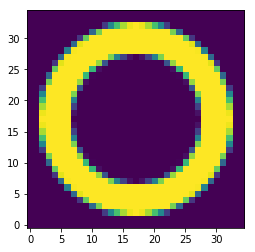

In [3]:
pup = create_pupil(1023*pscale, 31*pscale, 21*pscale, 0)
plt.figure(), plt.imshow(crop_img(pup, 35), origin=True);
fits.writeto('pup.fits', np.float32(pup), overwrite=True)

## with spiders

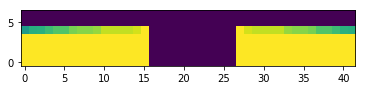

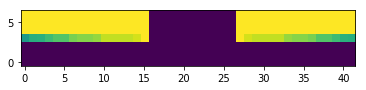

In [4]:
pup = create_pupil(1023*pscale, 1019*pscale, 0, 11*pscale)
# zoom to pupil edges
c = ngrid//2
w = 7
pup_bot = pup[:w,c-3*w:c+3*w]
pup_top = pup[-w:,c-3*w:c+3*w]
plt.figure(), plt.imshow(pup_top, origin=True);
plt.figure(), plt.imshow(pup_bot, origin=True);
fits.writeto('spi.fits', np.float32(pup), overwrite=True)
fits.writeto('spi_bot.fits', np.float32(pup_bot), overwrite=True)
fits.writeto('spi_top.fits', np.float32(pup_top), overwrite=True)